# Detecting noise with DBSCAN

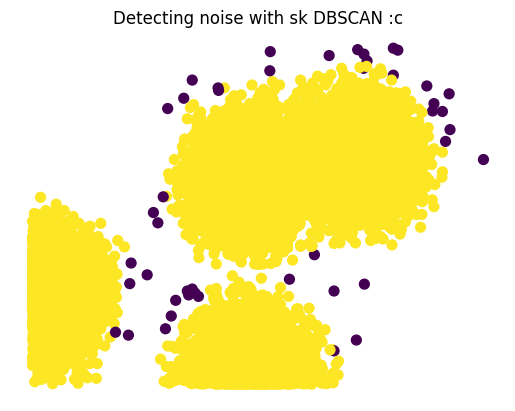

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Indicate the number of points
n_points = 20000

# randomly generating data points and noise 
points, y_true = make_blobs(n_samples=n_points, 
                            centers=4, 
                            cluster_std=0.06, 
                            random_state=11, 
                            center_box=(0, 1.0))

# only positive points and with three decimals
points = np.round(np.abs(points[:, ::-1]), 3)

# storing points into a csv file
np.savetxt("data/"+str(n_points)+"_data.csv", points, delimiter=",",  fmt="%.3f")


# clustering and detecting noise with dbscan
clusters = DBSCAN(eps=0.03, min_samples=10).fit_predict(points)

# plotting noise
plt.figure()
plt.title("Detecting noise with sk DBSCAN :c")
plt.scatter(points[:, 0], points[:, 1], c=np.where(clusters==-1, 0, 1), s=50)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()



#plt to plotly
import plotly.express as px
import pandas as pd

df = pd.read_csv(str(n_points)+"_results.csv", header=None)
df.columns = ['x', 'y', 'r']
#plot color if last column is 1 blue, if 0 red
fig = px.scatter(df, x="x", y="y", color=np.where(df['r']<0.5, 0, 1), size_max=60)
fig.show()


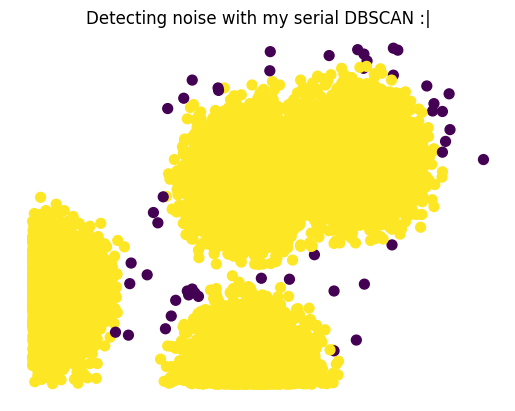

In [7]:
# loading results from c++ program into a numpy array
result = np.loadtxt("dump/"+str(n_points)+"_serial_results.csv", delimiter=",")

# plotting noise
plt.figure()
plt.title("Detecting noise with my serial DBSCAN :|")
plt.scatter(result.T[0], result.T[1], c=result.T[2], s=50)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()

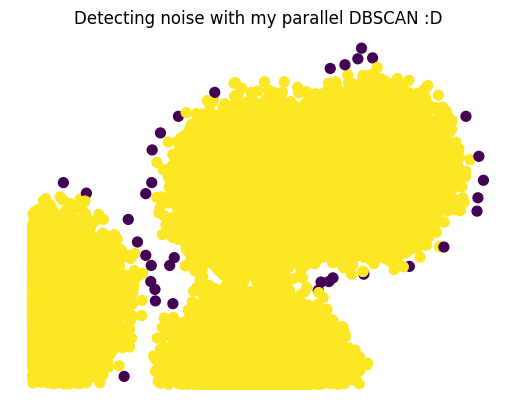

In [8]:
n_points=140000
# loading results from c++ program into a numpy array
result = np.loadtxt("dump/"+str(n_points)+"p_16n_results.csv", delimiter=",")

# plotting noise
plt.figure()
plt.title("Detecting noise with my parallel DBSCAN :D")
plt.scatter(result.T[0], result.T[1], c=result.T[2], s=50)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()